In [8]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

### Banekurver

In [37]:
def simple_linear(t, s0 = [1, 1], grads = [1, 2]):
    x0, y0 = s0
    a, b = grads

    return x0 + t * a, y0 + t * b

def circle(t, centre = [1, -1], R = 2):
    from numpy import sin, cos
    x0, y0 = centre

    return x0 + R * cos(t), y0 + R * sin(t)

def simple_parabolic(t, s0=[1, 1], grads=[1, 2], curves=[1, -1]):
    x0, y0 = s0
    a1, b1 = grads
    a2, b2 = curves

    return x0 + t * a1 + t**2 * a2, y0 + t * b1 + t**2 * b2

def trajectory(t, s0=[0,10], velocity=[15, 0], acceleration=[0, -9.81]):
    x, y = simple_parabolic(t, s0=s0, grads=velocity, curves=acceleration)
    y[y < 0] = 0
    return x, y

In [ ]:
t = np.linspace(0, 2*np.pi, 1000, endpoint=True)

frames = np.arange(0,1000,10)

In [42]:
def make_gif(t, x, y, fname='trash', efficient=True):

    if efficient:
        from os.path import exists

        if exists(fname + "gif"):
            print(f"{fname} already exists!")
            return

    frames = np.arange(0, len(t), len(t) // 100)
    
    xlim = (np.min(x)-1, np.max(x)+1)
    ylim = (np.min(y)-1, np.max(y)+1)

    fig, ax = plt.subplots()

    def animate2D(n):
        ax.clear()
        ax.set_title(f"t = {np.round(t[n], 3)}")
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_aspect('equal')

        return ax.plot(x[:n], y[:n])


    ani2D = animation.FuncAnimation(fig, animate2D, frames=frames, interval=1)

    ani2D.save(fname + ".gif")

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


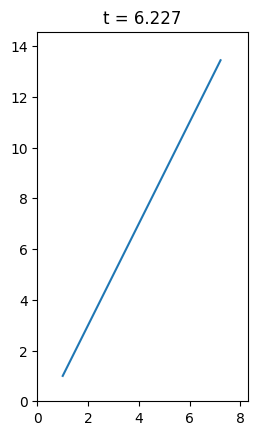

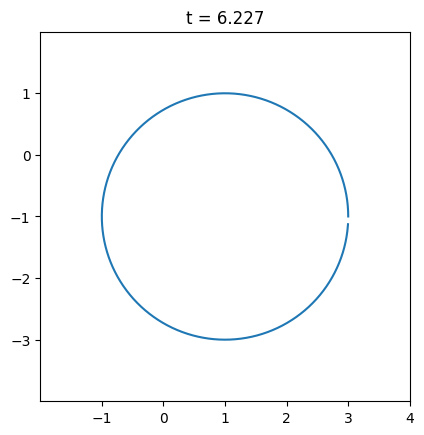

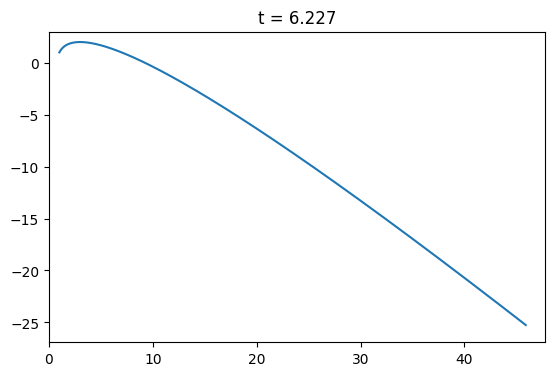

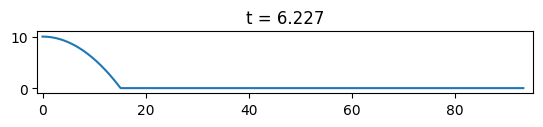

In [43]:
x, y = simple_linear(t)
make_gif(t, x, y, fname='linear')

x, y = circle(t)
make_gif(t, x, y, fname='circle')

x, y = simple_parabolic(t)
make_gif(t, x, y, fname='parabolic')

x, y = trajectory(t)
make_gif(t, x, y, fname='trajectory')

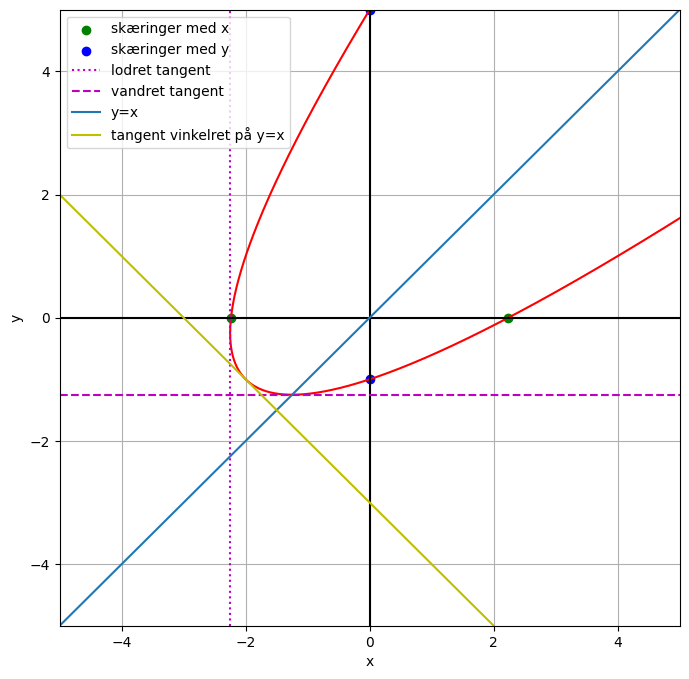

In [84]:
# Opgave

xmin, xmax = -5, 5
ymin, ymax = -5, 5

t = np.linspace(xmin, xmax, 1000, endpoint=True)
x = t**2 - 3 * t
y = t**2 - t - 1

plt.figure(figsize=(8,8))

plt.plot(x, y, c='r')
plt.plot([0, 0], [ymin, ymax], c='k')
plt.plot([xmin, xmax], [0, 0], c='k')

plt.scatter([-5**0.5, 5**0.5], [0, 0], c = 'g', label='skæringer med x')
plt.scatter([0, 0], [-1, 5], c='b', label='skæringer med y')

plt.plot([-9/4, -9/4], [ymin, ymax], c='m', linestyle='dotted', label='lodret tangent')
plt.plot([xmin, xmax], [-5/4, -5/4], c='m', linestyle='dashed', label='vandret tangent')

plt.plot(t, t, label='y=x')
plt.plot(-2 - t, -1 + t, c='y', label='tangent vinkelret på y=x')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.grid()
plt.savefig('figures/fig1.png', dpi=300, bbox_inches='tight')
plt.show()